<a href="https://colab.research.google.com/github/Krishnakalani111/credit-card-fraud/blob/main/credit_card_fault_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


In [ ]:
data = pd.read_csv("CreditCardDefault.csv")

In [ ]:

data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
# Print the shape of the data
# data = data.sample(frac = 0.1, random_state = 48)
print(data.shape)
print(data.describe())


(11683, 31)
               Time            V1            V2            V3            V4  \
count  11683.000000  11683.000000  11683.000000  11683.000000  11683.000000   
mean    7719.909783     -0.218930      0.274366      0.897415      0.279525   
std     5979.605669      1.562304      1.305756      1.273424      1.467618   
min        0.000000    -27.670569    -34.607649    -21.405836     -4.657545   
25%     2468.500000     -0.986679     -0.258310      0.416652     -0.616876   
50%     6329.000000     -0.346841      0.261619      0.949690      0.213597   
75%    11927.000000      1.159482      0.887528      1.616155      1.152661   
max    19929.000000      1.960497      9.067613      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  11683.000000  11683.000000  11683.000000  11682.000000  11682.000000   
mean      -0.080074      0.140209     -0.112851     -0.051813      0.894175   
std        1.185154      1.305368      

In [ ]:

fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


0.004212155076076678
Fraud Cases: 49
Valid Transactions: 11633


In [ ]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)



(11683, 30)
(11683,)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11678,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
dtype: int64

In [ ]:
Y.isnull().sum()

1

In [ ]:
X=X.dropna()
Y=Y.dropna()

In [ ]:
X.isnull().sum()
Y.isnull().sum()

0

In [ ]:
xData = X.values
yData = Y.values

In [ ]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
		xData, yData, test_size = 0.2)


In [ ]:
from sklearn.linear_model import LogisticRegression
# random forest model creation
lr = LogisticRegression()
lr.fit(xTrain, yTrain)
# predictions
yPred = lr.predict(xTest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is logistic regression")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is logistic regression
The accuracy is 0.9974326059050064
The precision is 0.5454545454545454
The recall is 0.8571428571428571
The F1-Score is 0.6666666666666665
The Matthews correlation coefficient is0.6826378115070276


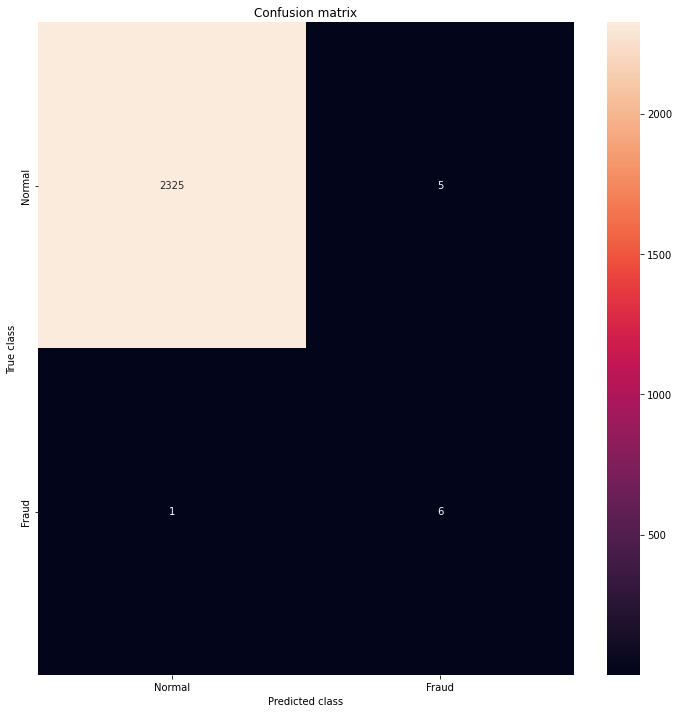

In [ ]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
			yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
